In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import rankdata

In [102]:
df = pd.read_csv("extracted/f1")

In [104]:
df[df['data'] == 'cloudstac-180 days']

,rank,model,data,median
60,1,lr-none,cloudstac-180 days,0.000
61,2,lr-weighted,cloudstac-180 days,0.000
62,3,lr-all,cloudstac-180 days,0.101
63,4,nb-all,cloudstac-180 days,0.138
64,5,tree-weighted,cloudstac-180 days,0.188
65,6,nb-none,cloudstac-180 days,0.194
66,6,nb-weighted,cloudstac-180 days,0.194
67,6,tree-none,cloudstac-180 days,0.200
68,7,rf-none,cloudstac-180 days,0.211
69,7,rf-all,cloudstac-180 days,0.250


In [4]:
models = np.unique(df["model"])

In [5]:
models

array(['lr-all', 'lr-none', 'lr-weighted', 'nb-all', 'nb-none',
       'nb-weighted', 'rf-all', 'rf-none', 'rf-weighted', 'tree-all',
       'tree-none', 'tree-weighted'], dtype=object)

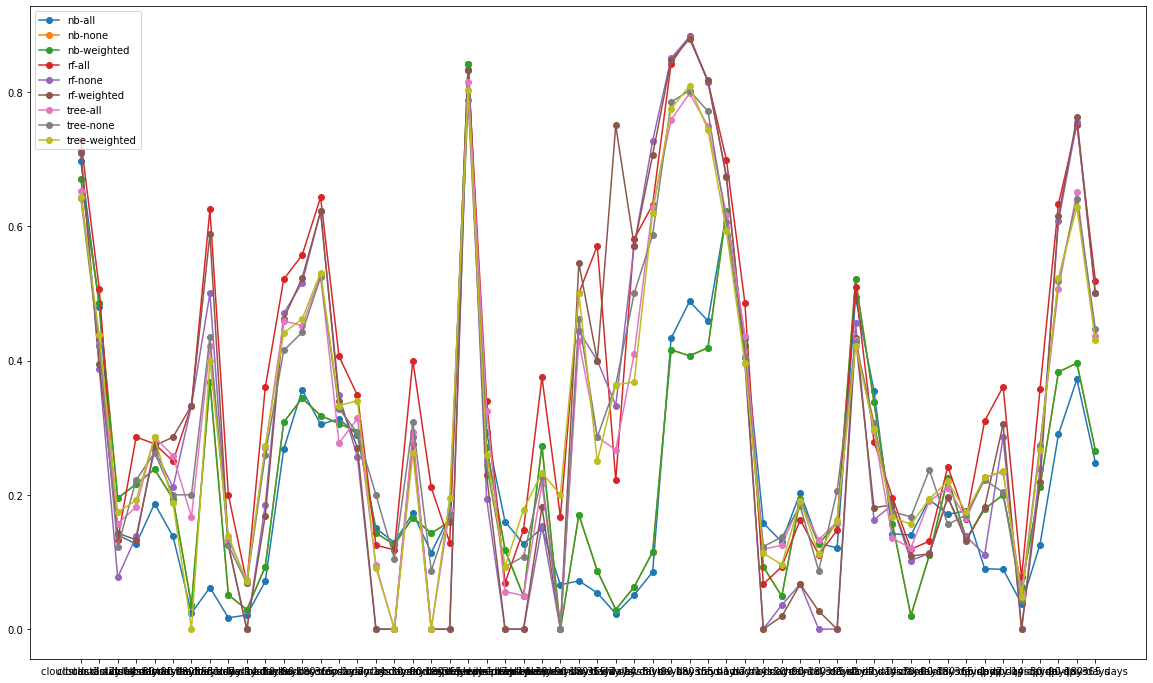

In [29]:
plt.figure(figsize=(20, 12))

for model in models:
    if model.startswith("lr"): continue
    mod_df = df.loc[df["model"] == model]
    plt.plot(mod_df["data"], mod_df["median"], 'o-', label=model)

plt.legend();

In [7]:
uniq_data = np.unique(df["data"])

In [8]:
len(uniq_data)

56

In [9]:
groups = df.groupby("data")

In [10]:
len(groups)

56

In [11]:
learners = {
    "rf": 0,
    "nb": 0,
    "tree": 0,
    "lr": 0
}

treatments = {
    "all": 0,
    "none": 0,
    "weighted": 0
}

In [45]:
for g in groups:
    data = g[0]
    pdf = g[1]
    
    winners = pdf.loc[pdf["rank"] == max(pdf["rank"])]
    for winner in winners["model"]:
        learner = winner.split("-")[0]
        tmt = winner.split("-")[1]
        
        learners[learner] += 1
        treatments[tmt] += 1

In [52]:
l_keys = list(learners.keys())
l_vals = list(learners.values())

t_keys = list(treatments.keys())
t_vals = list(treatments.values())

In [57]:
l_keys

['rf', 'nb', 'tree', 'lr']

In [58]:
full_names = ["Random Forest", "Naive Bayes", "Decision Tree", "Logistic Regression"]

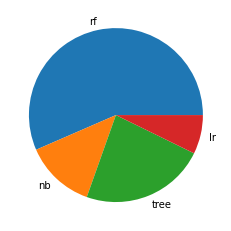

In [51]:
plt.pie(l_vals, labels=l_keys, radius=2);

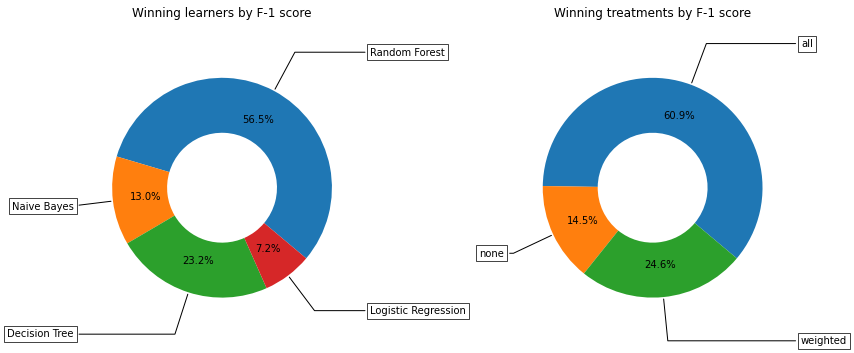

In [72]:
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(12, 8), subplot_kw=dict(aspect="equal"))

wedges, texts, _ = ax.pie(l_vals, wedgeprops=dict(width=0.5), startangle=-40, autopct='%1.1f%%', pctdistance=.7)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(full_names[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Winning learners by F-1 score", y=1.1);

# -----
wedges, texts, _ = ax1.pie(t_vals, wedgeprops=dict(width=0.5), startangle=-40, autopct='%1.1f%%', pctdistance=.7)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(t_keys[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax1.set_title("Winning treatments by F-1 score", y=1.1);
fig.tight_layout()

## pd

In [75]:
df = pd.read_csv("extracted/pd")
groups = df.groupby("data")

learners = {
    "rf": 0,
    "nb": 0,
    "tree": 0,
    "lr": 0
}

treatments = {
    "all": 0,
    "none": 0,
    "weighted": 0
}

for g in groups:
    data = g[0]
    pdf = g[1]
    
    winners = pdf.loc[pdf["rank"] == max(pdf["rank"])]
    for winner in winners["model"]:
        learner = winner.split("-")[0]
        tmt = winner.split("-")[1]
        
        learners[learner] += 1
        treatments[tmt] += 1

l_keys = list(learners.keys())
l_vals = list(learners.values())

t_keys = list(treatments.keys())
t_vals = list(treatments.values())

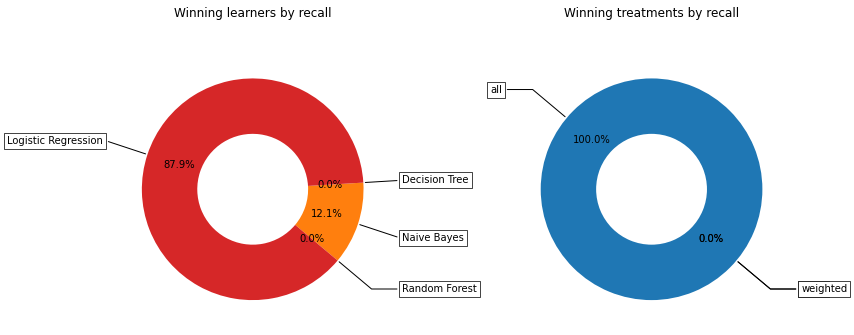

In [76]:
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(12, 8), subplot_kw=dict(aspect="equal"))

wedges, texts, _ = ax.pie(l_vals, wedgeprops=dict(width=0.5), startangle=-40, autopct='%1.1f%%', pctdistance=.7)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(full_names[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Winning learners by recall", y=1.1);

# -----
wedges, texts, _ = ax1.pie(t_vals, wedgeprops=dict(width=0.5), startangle=-40, autopct='%1.1f%%', pctdistance=.7)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(t_keys[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax1.set_title("Winning treatments by recall", y=1.1);
fig.tight_layout()

In [78]:
df = pd.read_csv("extracted/prec")
groups = df.groupby("data")

learners = {
    "rf": 0,
    "nb": 0,
    "tree": 0,
    "lr": 0
}

treatments = {
    "all": 0,
    "none": 0,
    "weighted": 0
}

for g in groups:
    data = g[0]
    pdf = g[1]
    
    winners = pdf.loc[pdf["rank"] == max(pdf["rank"])]
    for winner in winners["model"]:
        learner = winner.split("-")[0]
        tmt = winner.split("-")[1]
        
        learners[learner] += 1
        treatments[tmt] += 1

l_keys = list(learners.keys())
l_vals = list(learners.values())

t_keys = list(treatments.keys())
t_vals = list(treatments.values())

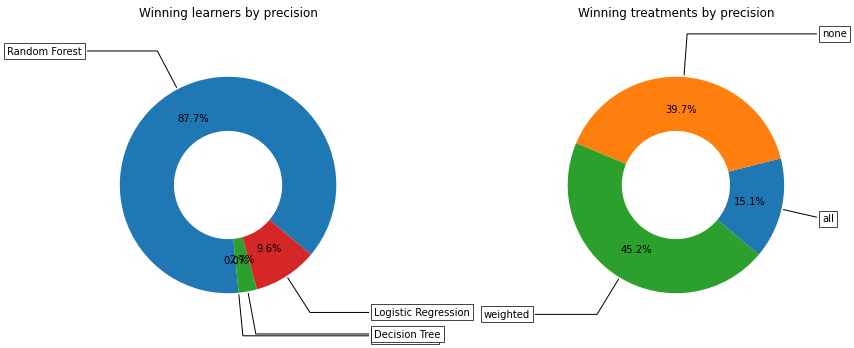

In [79]:
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(12, 8), subplot_kw=dict(aspect="equal"))

wedges, texts, _ = ax.pie(l_vals, wedgeprops=dict(width=0.5), startangle=-40, autopct='%1.1f%%', pctdistance=.7)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(full_names[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Winning learners by precision", y=1.1);

# -----
wedges, texts, _ = ax1.pie(t_vals, wedgeprops=dict(width=0.5), startangle=-40, autopct='%1.1f%%', pctdistance=.7)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(t_keys[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax1.set_title("Winning treatments by precision", y=1.1);
fig.tight_layout()

In [81]:
df = pd.read_csv("extracted/auc")
groups = df.groupby("data")

learners = {
    "rf": 0,
    "nb": 0,
    "tree": 0,
    "lr": 0
}

treatments = {
    "all": 0,
    "none": 0,
    "weighted": 0
}

for g in groups:
    data = g[0]
    pdf = g[1]
    
    winners = pdf.loc[pdf["rank"] == max(pdf["rank"])]
    for winner in winners["model"]:
        learner = winner.split("-")[0]
        tmt = winner.split("-")[1]
        
        learners[learner] += 1
        treatments[tmt] += 1

l_keys = list(learners.keys())
l_vals = list(learners.values())

t_keys = list(treatments.keys())
t_vals = list(treatments.values())

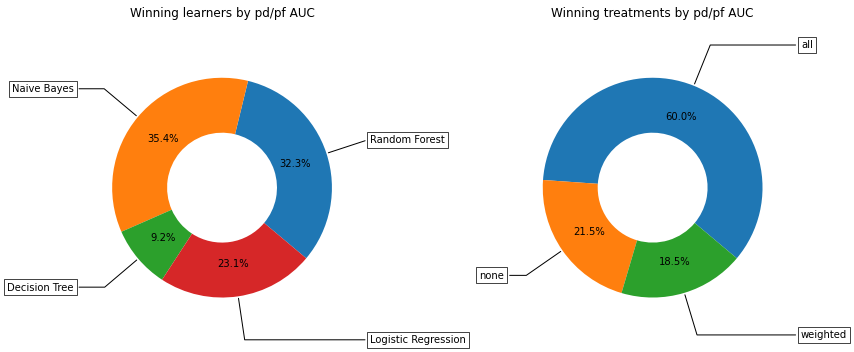

In [82]:
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(12, 8), subplot_kw=dict(aspect="equal"))

wedges, texts, _ = ax.pie(l_vals, wedgeprops=dict(width=0.5), startangle=-40, autopct='%1.1f%%', pctdistance=.7)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(full_names[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Winning learners by pd/pf AUC", y=1.1);

# -----
wedges, texts, _ = ax1.pie(t_vals, wedgeprops=dict(width=0.5), startangle=-40, autopct='%1.1f%%', pctdistance=.7)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(t_keys[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax1.set_title("Winning treatments by pd/pf AUC", y=1.1);
fig.tight_layout()

In [89]:
df = pd.read_csv("extracted/pf")
groups = df.groupby("data")

learners = {
    "rf": 0,
    "nb": 0,
    "tree": 0,
    "lr": 0
}

treatments = {
    "all": 0,
    "none": 0,
    "weighted": 0
}

for g in groups:
    data = g[0]
    pdf = g[1]
    
    winners = pdf.loc[pdf["rank"] == min(pdf["rank"])]
    for winner in winners["model"]:
        learner = winner.split("-")[0]
        tmt = winner.split("-")[1]
        
        learners[learner] += 1
        treatments[tmt] += 1

l_keys = list(learners.keys())
l_vals = list(learners.values())

t_keys = list(treatments.keys())
t_vals = list(treatments.values())

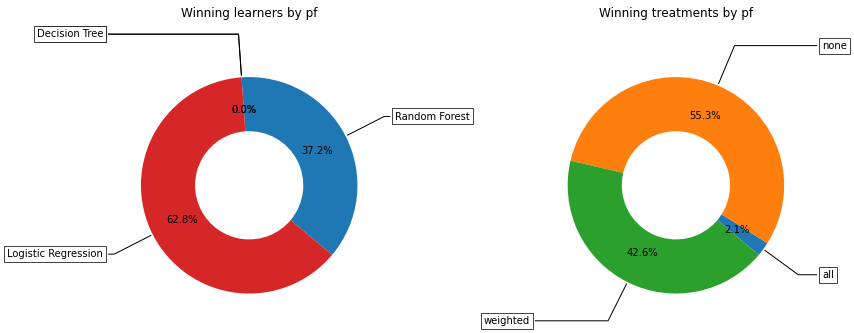

In [91]:
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(12, 8), subplot_kw=dict(aspect="equal"))

wedges, texts, _ = ax.pie(l_vals, wedgeprops=dict(width=0.5), startangle=-40, autopct='%1.1f%%', pctdistance=.7)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(full_names[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Winning learners by pf", y=1.1);

# -----
wedges, texts, _ = ax1.pie(t_vals, wedgeprops=dict(width=0.5), startangle=-40, autopct='%1.1f%%', pctdistance=.7)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(t_keys[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax1.set_title("Winning treatments by pf", y=1.1);
fig.tight_layout()

## Tabulating results

In [12]:
for g in groups:
    data = g[0]
    pdf = g[1]
    
    print(data)
    print('=' * len(data))
    
    pdf['treatment'] = [x.split('-')[1] for x in pdf['model']]
    print(pdf.groupby('treatment').apply(lambda df: df[df['rank'] == df['rank'].max()][['median', 'rank']]))
    print()

cloudstac-1 day
              median  rank
treatment                 
all       11   0.728    11
none      10   0.714    10
weighted  9    0.709     9

cloudstac-14 days
              median  rank
treatment                 
all       32   0.157     8
none      34   0.195    10
weighted  35   0.195    10

cloudstac-180 days
              median  rank
treatment                 
all       69   0.250     7
          70   0.258     7
none      68   0.211     7
weighted  71   0.286     7

cloudstac-30 days
              median  rank
treatment                 
all       47   0.286     9
none      46   0.222     8
weighted  45   0.216     8

cloudstac-365 days
              median  rank
treatment                 
all       83   0.333    10
none      81   0.333     9
weighted  82   0.333    10

cloudstac-7 days
              median  rank
treatment                 
all       23   0.507    10
none      21   0.486     9
weighted  22   0.486     9

cloudstac-90 days
              median  rank
treat

/Users/ryedida/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  




cocoo-14 days
               median  rank
treatment                  
all       202   0.150     8
none      203   0.200     9
weighted  201   0.143     7

cocoo-180 days
               median  rank
treatment                  
all       239   0.211     8
none      236   0.143     5
weighted  237   0.143     6

cocoo-30 days
               median  rank
treatment                  
all       215   0.129    11
none      213   0.126     9
weighted  214   0.126    10

cocoo-365 days
               median  rank
treatment                  
all       250   0.179     6
none      248   0.170     5
weighted  251   0.195     6

cocoo-7 days
               median  rank
treatment                  
all       191   0.348     8
none      187   0.294     6
weighted  190   0.340     8

cocoo-90 days
               median  rank
treatment                  
all       227   0.400    10
none      226   0.308     9
weighted  222   0.263     7
          223   0.276     7

deeplearnin-1 day
               median

In [17]:
df_auc = pd.read_csv("extracted/auc")
groups_auc = df_auc.groupby("data")
for g in groups_auc:
    data = g[0]
    pdf = g[1]
    
    print(data)
    print('=' * len(data))
    
    pdf['treatment'] = [x.split('-')[1] for x in pdf['model']]
    print(pdf.groupby('treatment').apply(lambda df: df[df['rank'] == df['rank'].max()][['median', 'rank']]))
    print()

cloudstac-1 day
              median  rank
treatment                 
all       11   0.760    10
none      10   0.760    10
weighted  9    0.755     9

cloudstac-14 days
              median  rank
treatment                 
all       33   0.568     9
none      34   0.643    10
weighted  35   0.643    11

cloudstac-180 days
              median  rank
treatment                 
all       69   0.748     7
none      70   0.791     8
weighted  71   0.791     8

cloudstac-30 days
              median  rank
treatment                 
all       45   0.609     7
none      46   0.647     8
weighted  47   0.647     8

cloudstac-365 days
              median  rank
treatment                 
all       83   0.624    10
none      81   0.624    10
weighted  82   0.624    10

cloudstac-7 days
              median  rank
treatment                 
all       23   0.658     7
none      21   0.611     6
weighted  22   0.611     6

cloudstac-90 days
              median  rank
treatment                 
all  

/Users/ryedida/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


               median  rank
treatment                  
all       179   0.884    11
none      176   0.851     8
weighted  177   0.851     9

cocoo-14 days
               median  rank
treatment                  
all       203   0.887     8
none      201   0.806     6
weighted  202   0.806     7

cocoo-180 days
               median  rank
treatment                  
all       239   0.856     9
none      237   0.809     7
weighted  238   0.809     8

cocoo-30 days
               median  rank
treatment                  
all       215   0.880    11
none      212   0.835     8
weighted  213   0.835     9

cocoo-365 days
               median  rank
treatment                  
all       251   0.813     7
none      248   0.721     4
weighted  249   0.721     5

cocoo-7 days
               median  rank
treatment                  
all       191   0.845    11
none      189   0.829     9
weighted  190   0.829    10

cocoo-90 days
               median  rank
treatment                  
all       227

In [22]:
df_pd = pd.read_csv("extracted/pd")
groups_pd = df_pd.groupby("data")
for g in groups_pd:
    data = g[0]
    pdf = g[1]
    
    print(data)
    print('=' * len(data))
    
    pdf['treatment'] = [x.split('-')[1] for x in pdf['model']]
    print(pdf.groupby('treatment').apply(lambda df: df[df['rank'] == df['rank'].max()][['median', 'rank']]))
    print()

cloudstac-1 day
              median  rank
treatment                 
all       11   0.981     9
none      8    0.722     6
weighted  7    0.715     5

cloudstac-14 days
              median  rank
treatment                 
all       35    0.92    12
none      32    0.60     9
weighted  33    0.60    10

cloudstac-180 days
              median  rank
treatment                 
all       71   1.000    11
none      68   0.867     8
weighted  69   0.867     9

cloudstac-30 days
              median  rank
treatment                 
all       47   0.917    11
none      44   0.500     8
weighted  45   0.500     9

cloudstac-365 days
              median  rank
treatment                 
all       83    0.50     9
none      79    0.25     7
weighted  78    0.25     7
          80    0.25     7

/Users/ryedida/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.




cloudstac-7 days
              median  rank
treatment                 
all       23   0.982    11
none      20   0.771     8
weighted  21   0.771     9

cloudstac-90 days
              median  rank
treatment                 
all       59   0.931    12
none      56   0.690     9
weighted  57   0.690    10

cocoo-1 day
               median  rank
treatment                  
all       178   1.000    11
          179   1.000    11
none      176   0.923     9
weighted  177   0.923    10

cocoo-14 days
               median  rank
treatment                  
all       203     1.0     9
none      200     0.8     6
weighted  201     0.8     7

cocoo-180 days
               median  rank
treatment                  
all       239   1.000     8
none      236   0.929     5
weighted  237   0.929     6

cocoo-30 days
               median  rank
treatment                  
all       215   1.000     9
none      212   0.889     6
weighted  213   0.889     7

cocoo-365 days
               median  rank
t

In [46]:
df_pf = pd.read_csv("extracted/pf")
groups_pf = df_pf.groupby("data")
for g in groups_pf:
    data = g[0]
    pdf = g[1]
    
    print(data)
    print('=' * len(data))
    
    pdf['treatment'] = [x.split('-')[1] for x in pdf['model']]
    print(pdf.groupby('treatment').apply(lambda df: df[df['rank'] == df['rank'].min()][['median', 'rank']]))
    

    print(pdf.groupby('treatment').apply(lambda df: df[df['rank'] == df['rank'].min()][['median', 'rank']]).loc['none', 'median'].iloc[-1])
    print()
    print()

cloudstac-1 day
             median  rank
treatment                
all       7   0.287     7
none      0   0.191     1
weighted  1   0.200     2
0.191


cloudstac-14 days
              median  rank
treatment                 
all       28   0.011     3
none      24   0.000     1
weighted  25   0.000     1
0.0


cloudstac-180 days
              median  rank
treatment                 
all       64   0.016     4
none      60   0.000     1
weighted  61   0.000     1
0.0


cloudstac-30 days
              median  rank
treatment                 
all       40   0.036     4
none      36   0.000     1
weighted  37   0.000     1
0.0

/Users/ryedida/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.





cloudstac-365 days
              median  rank
treatment                 
all       74   0.003     1
none      72   0.003     1
          75   0.003     1
weighted  73   0.003     1
0.003


cloudstac-7 days
              median  rank
treatment                 
all       16   0.190     5
none      12   0.007     1
weighted  13   0.007     2
0.006999999999999999


cloudstac-90 days
              median  rank
treatment                 
all       52   0.056     5
none      49   0.019     2
weighted  48   0.011     1
0.019


cocoo-1 day
               median  rank
treatment                  
all       173   0.058     6
none      168   0.004     1
weighted  169   0.016     2
0.004


cocoo-14 days
               median  rank
treatment                  
all       196   0.010     2
none      192   0.002     1
          194   0.002     1
weighted  193   0.002     1
          195   0.002     1
0.002


cocoo-180 days
               median  rank
treatment                  
all       232   0.006  

weighted  649   0.014     2
0.013000000000000001


qpi-30 days
               median  rank
treatment                  
all       628   0.011     3
none      624   0.000     1
weighted  625   0.000     1
0.0


qpi-365 days
               median  rank
treatment                  
all       664   0.028     4
none      660   0.000     1
weighted  661   0.000     1
0.0


qpi-7 days
               median  rank
treatment                  
all       604   0.005     3
none      600   0.000     1
weighted  601   0.000     1
0.0


qpi-90 days
               median  rank
treatment                  
all       640   0.032     5
none      636   0.000     1
weighted  637   0.000     2
0.0




In [100]:
tab_header = r"""
\newcommand{\lightgray}[1]{\cellcolor{blue!7}\textcolor{black}{#1}}
\newcommand{\gray}[1]{\cellcolor{blue!20}\textcolor{black}{#1}}

\begin{table}[!t]
\caption{Non-DL results with different weight treatments.
Cells show medians of 10 runs.
 \colorbox{blue!20}{Dark blue} shows  top rank (note: for pf, {\em less}
 is {\em better}), \colorbox{blue!7}{light blue} shows rank two;  white shows  lowest rank (worst performance). 
Rankings were calculated via Scott-Knott. The train and test versions used here are the same as the DODGE paper.}
\label{tab:results}
~~~~~~~~\begin{tabular}{ll|llll}
\toprule
 Dataset  &  Treatment     & AUC  & f1 & recall & pf   \\ \midrule
   
"""

In [101]:
for g_f1, g_auc, g_pd, g_pf in zip(groups, groups_auc, groups_pd, groups_pf):
    # Fetch dataset name
    data = g_f1[0]
    
    # Fetch the groups (dataframes)
    pdf_f1, pdf_auc, pdf_pd, pdf_pf = g_f1[1], g_auc[1], g_pd[1], g_pf[1]
    
    # Obtain treatment name from the model name
    get_treatments = lambda pdf: [x.split('-')[1] for x in pdf['model']]
    pdf_f1['treatment'], pdf_auc['treatment'], pdf_pd['treatment'], pdf_pf['treatment'] = \
        tuple(map(get_treatments, (pdf_f1, pdf_auc, pdf_pd, pdf_pf)))
    
    # Get a summarized view of the DataFrame
    get_summarized = lambda pdf, is_pf: pdf.groupby('treatment').apply(
        lambda df: df[df['rank'] == (df['rank'].min() if is_pf else df['rank'].max())][['median', 'rank']])
    
    sum_f1, sum_auc, sum_pd = tuple(
        map(
            lambda x: get_summarized(x, False),
            (pdf_f1, pdf_auc, pdf_pd)
        )
    )
    sum_pf = get_summarized(pdf_pf, True)
    
    # Append the first part of the row
    tab_header += '\multicolumn{1}{l}{\multirow{3}{*}{' + data + '}} &'
    
    # Return the rank of a treatment, along with the top rank
    def get_ranks(df, tmt, pf):
        df['rank'] = df['rank'].rank(method='dense').astype(int)
        return (df.loc[tmt, 'rank'].iloc[-1], (df['rank'].min() if pf else df['rank'].max()))
    
    # Color the passed text according to the relative rank
    color_text = lambda inside, rank, top_rank, pf: (r'\gray{' if rank == top_rank else 
                                                r'\lightgray{' if rank == (top_rank + 1 if pf else
                                                                          top_rank - 1) else '') + \
                                                inside + ('}' if (rank > top_rank - 2 and not pf) or
                                                         (rank < top_rank + 2 and pf) else '')
    # Get the cell contents
    cell_writer = lambda df: f'{round(df.loc[treatment, "median"].iloc[-1], 3)}'
    
    # Format the cell using the above helper lambdas
    cell_formatter = lambda df, tmt, pf=False: f'& {color_text(cell_writer(df), *get_ranks(df, tmt, pf), pf)}'
    
    # Update the table markup
    for treatment in ['none', 'weighted', 'all']:
        print(data, treatment)
        print(get_ranks(sum_f1, treatment, False), cell_writer(sum_f1))
        print()
        # We need the & for all treatments but the first
        if treatment != 'none':
            tab_header += '&'
        
        # Use our formatting lambdas to write the cell values and append a newline
        tab_header += (f'{treatment}{cell_formatter(sum_auc, treatment)}{cell_formatter(sum_f1, treatment)}' + 
                       f'{cell_formatter(sum_pd, treatment)}{cell_formatter(sum_pf, treatment, True)}' + r'\\ ')
        
        # We need to add this for all treatments except the last
        if treatment != 'all':
            tab_header += '\multicolumn{1}{c}{}'
        else:
            tab_header += '\midrule '

/Users/ryedida/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


cloudstac-1 day none
(2, 3) 0.714

cloudstac-1 day weighted
(1, 3) 0.709

cloudstac-1 day all
(3, 3) 0.728

cloudstac-14 days none
(2, 2) 0.195

cloudstac-14 days weighted
(2, 2) 0.195

cloudstac-14 days all
(1, 2) 0.157

cloudstac-180 days none
(1, 1) 0.211

cloudstac-180 days weighted
(1, 1) 0.286

cloudstac-180 days all
(1, 1) 0.258

cloudstac-30 days none
(1, 2) 0.222

cloudstac-30 days weighted
(1, 2) 0.216

cloudstac-30 days all
(2, 2) 0.286

cloudstac-365 days none
(1, 2) 0.333

cloudstac-365 days weighted
(2, 2) 0.333

cloudstac-365 days all
(2, 2) 0.333

cloudstac-7 days none
(1, 2) 0.486

cloudstac-7 days weighted
(1, 2) 0.486

cloudstac-7 days all
(2, 2) 0.507

cloudstac-90 days none
(1, 2) 0.267

cloudstac-90 days weighted
(2, 2) 0.286

cloudstac-90 days all
(2, 2) 0.286

cocoo-1 day none
(2, 3) 0.348

cocoo-1 day weighted
(1, 3) 0.34

cocoo-1 day all
(3, 3) 0.406

cocoo-14 days none
(3, 3) 0.2

cocoo-14 days weighted
(1, 3) 0.143

cocoo-14 days all
(2, 3) 0.15

cocoo-180 d

In [97]:
tab_header += r"""
                                         \bottomrule
\end{tabular}
\end{table}
"""

In [98]:
print(tab_header)


\newcommand{\lightgray}[1]{\cellcolor{blue!7}\textcolor{black}{#1}}
\newcommand{\gray}[1]{\cellcolor{blue!20}\textcolor{black}{#1}}

\begin{table}[!t]
\caption{Non-DL results with different weight treatments.
Cells show medians of 10 runs.
 \colorbox{blue!20}{Dark blue} shows  top rank (note: for pf, {\em less}
 is {\em better}), \colorbox{blue!7}{light blue} shows rank two;  white shows  lowest rank (worst performance). 
Rankings were calculated via Scott-Knott. The train and test versions used here are the same as the DODGE paper.}
\label{tab:results}
~~~~~~~~\begin{tabular}{ll|llll}
\toprule
 Dataset  &  Treatment     & AUC  & f1 & recall & pf   \\ \midrule
   
\multicolumn{1}{l}{\multirow{3}{*}{cloudstac-1 day}} &none& \gray{0.76}& \lightgray{0.714}& \lightgray{0.722}& \gray{0.191}\\ \multicolumn{1}{c}{}&weighted& \lightgray{0.755}& 0.709& 0.715& \lightgray{0.2}\\ \multicolumn{1}{c}{}&all& \gray{0.76}& \gray{0.728}& \gray{0.981}& 0.287\\ \midrule \multicolumn{1}{l}{\multirow{3}{*}